In [26]:
import numpy as np
import matplotlib.pyplot as plt

### Define the velocity components u(x, y) and v(x, y)


In [27]:
def u(x, y):
    return 2*x

def v(x, y):
    return -2*y

### Compute the numerical partial derivatives using central difference


In [28]:
def compute_divergence(x, y, dx, dy):
    du_dx = (u(x + dx, y) - u(x - dx, y)) / (2 * dx)
    dv_dy = (v(x, y + dy) - v(x, y - dy)) / (2 * dy)
    
    return du_dx + dv_dy

### Define the grid


In [29]:
x_min, x_max, y_min, y_max = -5, 5, -5, 5
dx, dy = 0.1, 0.1
x = np.arange(x_min, x_max, dx)
y = np.arange(y_min, y_max, dy)

X, Y = np.meshgrid(x, y)

### Compute the divergence over the grid


In [30]:
divergence = np.zeros_like(X)

for i in range(len(x)):
    for j in range(len(y)):
        divergence[j, i] = compute_divergence(X[j, i], Y[j, i], dx, dy)

In [32]:
# Check if the divergence is close to zero
tolerance = 1e-6
max_divergence = np.max(np.abs(divergence))

if max_divergence < tolerance:
    print(f"Confirmation: The divergence is zero (or very close to zero). Max divergence = {max_divergence:.2e}")
else:
    print(f"Warning: The divergence is not zero. Max divergence = {max_divergence:.2e}")

Confirmation: The divergence is zero (or very close to zero). Max divergence = 8.88e-15


### Plot the divergence


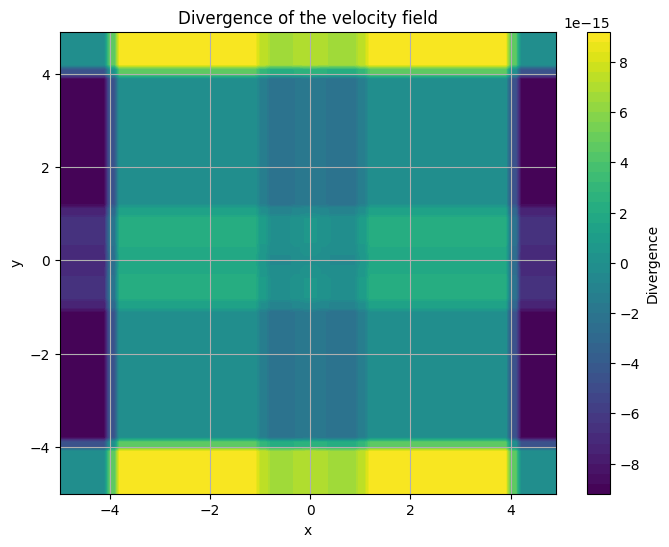

In [37]:
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, divergence, levels=50, cmap='viridis')
plt.colorbar(label='Divergence')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Divergence of the velocity field')
plt.grid(True)
plt.show()